In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Import classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

In [3]:
# Load the dataset
df = pd.read_csv('/content/heart_disease.csv')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


In [5]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values in Each Column:\n", missing_values)

# Check the total number of missing values
total_missing = missing_values.sum()
print(f"\nTotal Missing Values: {total_missing}")

Missing Values in Each Column:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Total Missing Values: 0


In [6]:
print('Shape of the data is ', df.shape)

Shape of the data is  (303, 14)


In [7]:
# Check the unique values and their counts
print("Target Variable Distribution:")
print(df['target'].value_counts())

# Percentage distribution
print("\nPercentage Distribution:")
print(df['target'].value_counts(normalize=True) * 100)

Target Variable Distribution:
target
0    164
1    139
Name: count, dtype: int64

Percentage Distribution:
target
0    54.125413
1    45.874587
Name: proportion, dtype: float64


<ipython-input-8-ea3657b30417>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['target'], palette='pastel')


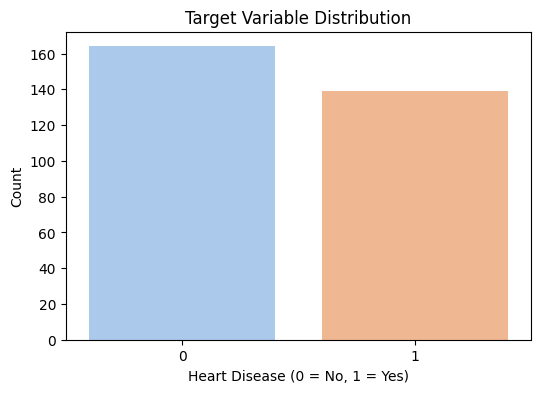

In [8]:
# Plot the target variable distribution
plt.figure(figsize=(6,4))
sns.countplot(x=df['target'], palette='pastel')
plt.title("Target Variable Distribution")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

Numerical Features: Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


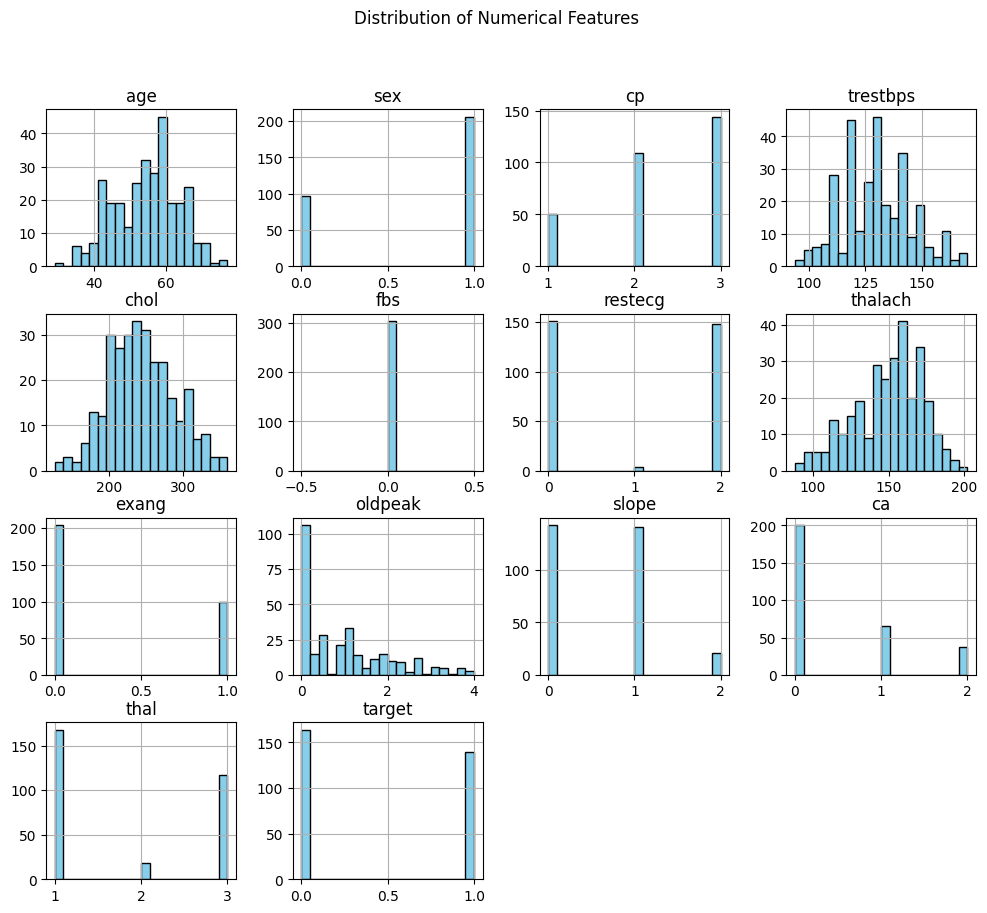

In [36]:
# Selecting numerical columns
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical Features:", numerical_features)
# Plot histograms for numerical features
df[numerical_features].hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numerical Features")
plt.show()

In [13]:
df[numerical_features].describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
sex,303.0,0.679868,0.467299,0.0,0.0,1.0,1.0,1.0
cp,303.0,2.158416,0.960126,0.0,2.0,2.0,3.0,3.0
trestbps,303.0,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.990099,0.994971,0.0,0.0,1.0,2.0,2.0
thalach,303.0,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [20]:
# Identify numerical columns
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

# Compute IQR for each numerical column
Q1 = df[numerical_features].quantile(0.25)  # First quartile (25th percentile)
Q3 = df[numerical_features].quantile(0.75)  # Third quartile (75th percentile)
IQR = Q3 - Q1  # Interquartile Range

# Calculate lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Impute outliers with median
for feature in numerical_features:
    median = df[feature].median()
    df[feature] = np.where((df[feature] < lower_bound[feature]) | (df[feature] > upper_bound[feature]), median, df[feature])

df.info()
df.head()
df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  target    303 non-null    float64
dtypes: float64(14)
memory usage: 33.3 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,45.0,1.0,2.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,1.0,0.0,3.0,1.0
299,68.0,1.0,3.0,144.0,193.0,0.0,0.0,141.0,0.0,3.4,1.0,2.0,3.0,1.0
300,57.0,1.0,3.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,1.0,1.0,3.0,1.0
301,57.0,0.0,1.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,1.0,1.0,1.0,1.0
302,38.0,1.0,2.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,0.0,0.0,1.0,0.0


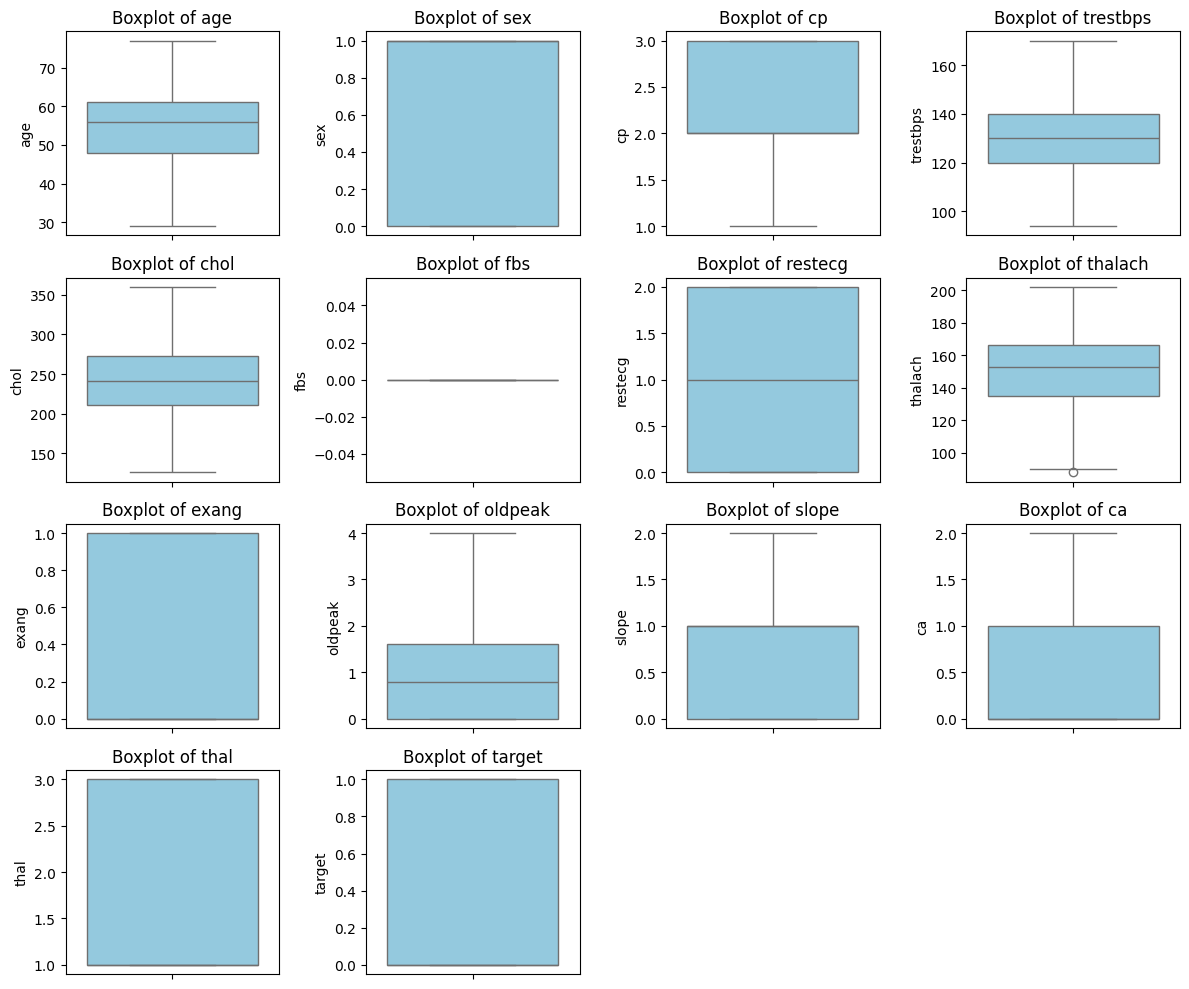

In [21]:
plt.figure(figsize=(12, 10)) # Increased figure height to accommodate more subplots
for i, col in enumerate(numerical_features):
    plt.subplot(4, 4, i + 1)  # Adjusted grid to 4 rows x 4 columns
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.xlabel('')
plt.tight_layout()
plt.show()

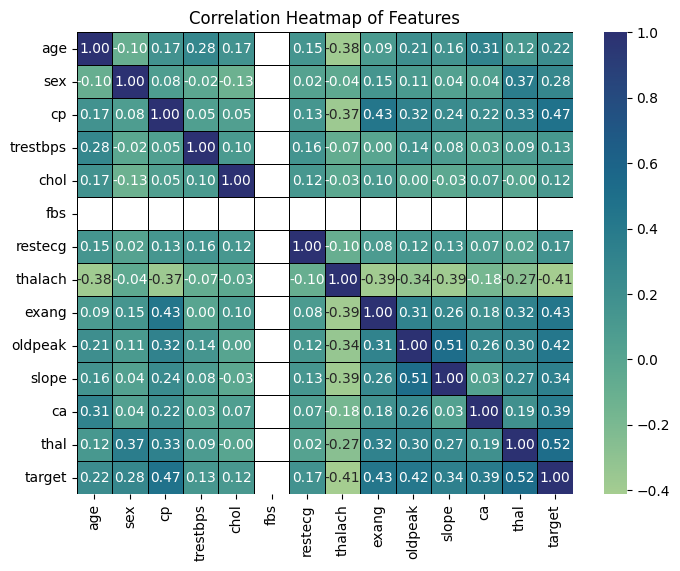

In [25]:
# Compute the correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='crest', fmt=".2f", linewidths=0.5, linecolor='black')
plt.title('Correlation Heatmap of Features')
plt.show()

In [26]:
from sklearn.preprocessing import OneHotEncoder

# Assuming 'data' is your DataFrame
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_data = encoder.fit_transform(df[categorical_features])

encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_features))

final_df = pd.concat([df.drop(categorical_features, axis=1), encoded_df], axis=1)


final_df.head()
final_df.describe()

,age,trestbps,chol,thalach,oldpeak,target,sex_0.0,sex_1.0,cp_1.0,cp_2.0,...,exang_1.0,slope_0.0,slope_1.0,slope_2.0,ca_0.0,ca_1.0,ca_2.0,thal_1.0,thal_2.0,thal_3.0
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,...,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,130.158416,243.438944,149.877888,0.971617,0.458746,0.320132,0.679868,0.165017,0.359736,...,0.326733,0.468647,0.462046,0.069307,0.660066,0.214521,0.125413,0.554455,0.059406,0.386139
std,9.038662,15.208310,44.689533,22.422529,1.041070,0.499120,0.467299,0.467299,0.371809,0.480717,...,0.469794,0.499842,0.499382,0.254395,0.474470,0.411169,0.331734,0.497848,0.236774,0.487668
min,29.000000,94.000000,126.000000,88.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,120.000000,211.000000,135.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,130.000000,241.000000,153.000000,0.800000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,61.000000,140.000000,273.000000,166.000000,1.600000,1.000000,1.000000,1.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,77.000000,170.000000,360.000000,202.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
X = final_df.drop('target', axis=1)  # Features
y = final_df['target']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features using StandardScaler
numerical_cols = X.select_dtypes(include=np.number).columns
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

Logistic Regression Accuracy: 0.8361
              precision    recall  f1-score   support

         0.0       0.85      0.85      0.85        33
         1.0       0.82      0.82      0.82        28

    accuracy                           0.84        61
   macro avg       0.83      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61

Confusion Matrix:
 [[28  5]
 [ 5 23]]
--------------------------------------------------
Decision Tree Accuracy: 0.6885
              precision    recall  f1-score   support

         0.0       0.69      0.76      0.72        33
         1.0       0.68      0.61      0.64        28

    accuracy                           0.69        61
   macro avg       0.69      0.68      0.68        61
weighted avg       0.69      0.69      0.69        61

Confusion Matrix:
 [[25  8]
 [11 17]]
--------------------------------------------------
Random Forest Accuracy: 0.8852
              precision    recall  f1-score   support

         0.0  

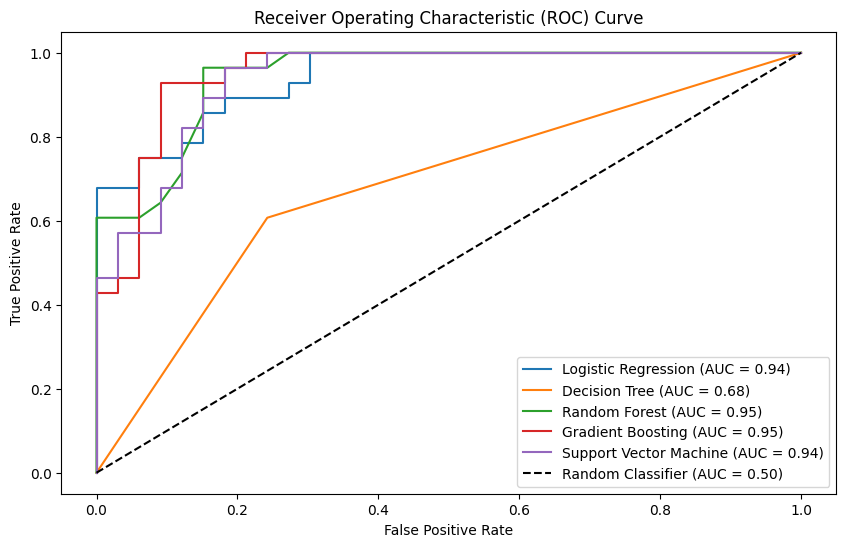


Best Model: Random Forest with Accuracy: 0.8852


<ipython-input-43-22621d3da3ec>:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Classifier', y='Accuracy', data=results_df, palette='coolwarm')


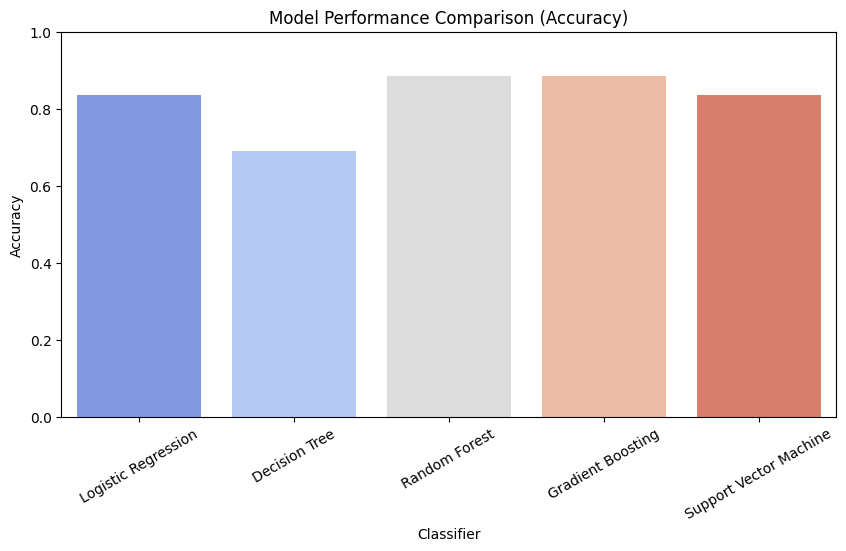


Final Model Performance Comparison:
                Classifier  Accuracy  Precision    Recall  F1-score   AUC-ROC
0     Logistic Regression  0.836066   0.821429  0.821429  0.821429  0.942641
1           Decision Tree  0.688525   0.680000  0.607143  0.641509  0.682359
2           Random Forest  0.885246   0.838710  0.928571  0.881356  0.945346
3       Gradient Boosting  0.885246   0.838710  0.928571  0.881356  0.951299
4  Support Vector Machine  0.836066   0.846154  0.785714  0.814815  0.937229


In [43]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
# Import roc_curve as well if you are using it for plotting ROC curves
from sklearn.metrics import roc_curve
# Step 1: Standardizing numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Assuming X contains the features
y = df['target']  # Assuming 'target' is the label column

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Step 3: Define classifiers
classifiers = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('Support Vector Machine', SVC(probability=True, random_state=42))
]

# Step 4: Store evaluation results
results = []
plt.figure(figsize=(10, 6))  # Prepare for ROC curve plotting

# Step 5: Train and evaluate each model
for name, clf in classifiers:
    # Train model
    clf.fit(X_train, y_train)

    # Predictions
    y_pred = clf.predict(X_test)
    y_prob = clf.predict_proba(X_test)[:, 1]  # Probability for positive class (1)

    # Compute Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)

    # Store results
    results.append([name, accuracy, precision, recall, f1, roc_auc])

    # Print Classification Report & Confusion Matrix
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("-" * 50)

    # Compute and plot ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Step 6: Display ROC curves
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.50)')  # Diagonal reference line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Step 7: Convert results into DataFrame
results_df = pd.DataFrame(results, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC-ROC'])

# Step 8: Find the best model based on accuracy
best_model = results_df.loc[results_df['Accuracy'].idxmax()]
print(f"\nBest Model: {best_model['Classifier']} with Accuracy: {best_model['Accuracy']:.4f}")

# Step 9: Plot accuracy comparison
plt.figure(figsize=(10, 5))
sns.barplot(x='Classifier', y='Accuracy', data=results_df, palette='coolwarm')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison (Accuracy)')
plt.xticks(rotation=30)
plt.ylim(0, 1)
plt.show()

# Step 10: Display the final results table
print("\nFinal Model Performance Comparison:\n", results_df)

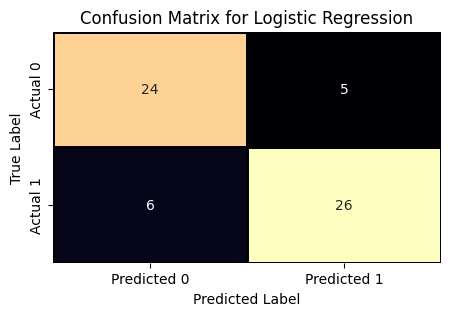

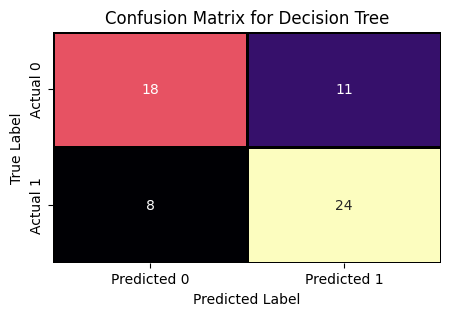

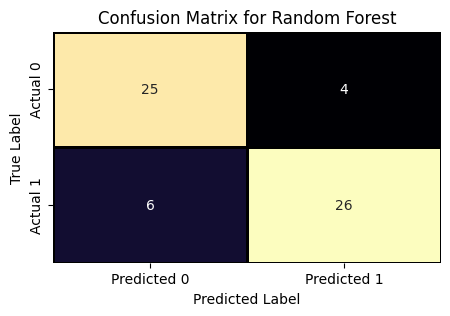

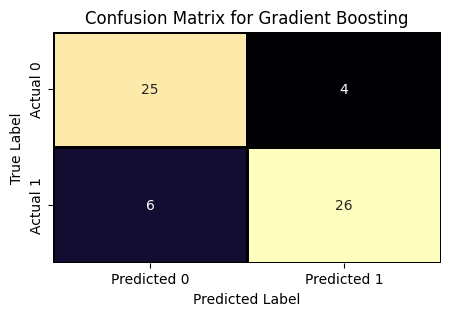

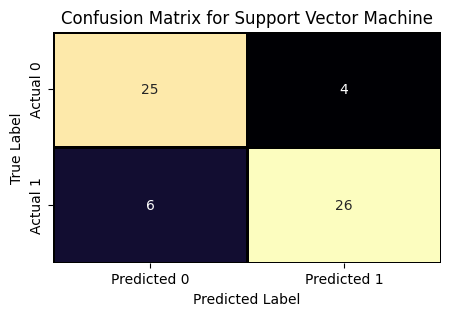

In [31]:
# Iterate through classifiers and plot confusion matrices
for name, classifier in classifiers.items(): # Changed line to iterate over items
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 3))  # Slightly increased size for better visibility
    sns.heatmap(cm, annot=True, fmt="d", cmap="magma",
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'],
                cbar=False, linewidths=1, linecolor='black')

    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

<ipython-input-34-b07e61ac5331>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=random_forest_importances, y=random_forest_importances.index, palette="viridis")


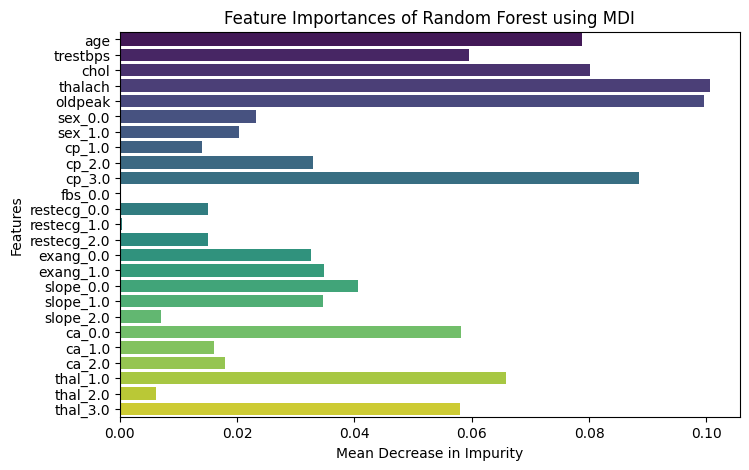

<ipython-input-34-b07e61ac5331>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gradient_boosting_importances, y=gradient_boosting_importances.index, palette="magma")


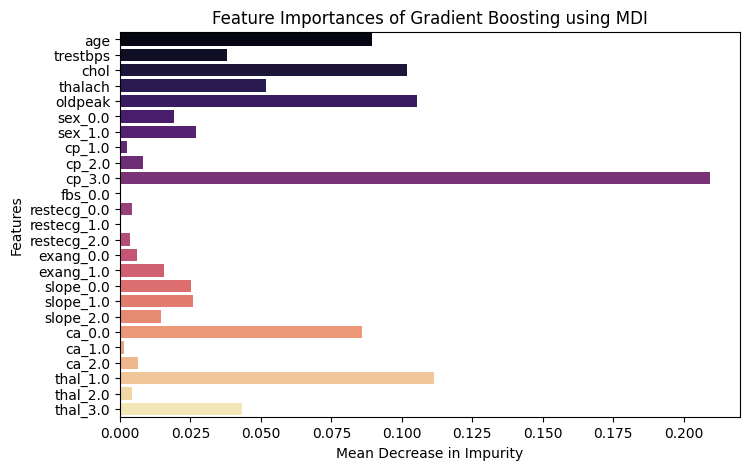

In [34]:
# Feature Importance for Random Forest
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
importances = rf_classifier.feature_importances_
# Get feature names from the original DataFrame 'X' before scaling
feature_names = X.columns  # Changed line to access columns from X
random_forest_importances = pd.Series(importances, index=feature_names)

plt.figure(figsize=(8, 5))
sns.barplot(x=random_forest_importances, y=random_forest_importances.index, palette="viridis")
plt.title("Feature Importances of Random Forest using MDI")
plt.xlabel("Mean Decrease in Impurity")
plt.ylabel("Features")
plt.show()

# Feature Importance for Gradient Boosting
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train, y_train)
importances = gb_classifier.feature_importances_
# Get feature names from the original DataFrame 'X' before scaling
feature_names = X.columns  # Changed line to access columns from X
gradient_boosting_importances = pd.Series(importances, index=feature_names)

plt.figure(figsize=(8, 5))
sns.barplot(x=gradient_boosting_importances, y=gradient_boosting_importances.index, palette="magma")
plt.title("Feature Importances of Gradient Boosting using MDI")
plt.xlabel("Mean Decrease in Impurity")
plt.ylabel("Features")
plt.show()